## 6.1　パラメータの更新

### 6.1.2　SGD

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6.1.4　Momentum

In [2]:
import numpy as np

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*self.grads[key]
            params[key] += self.v[key]

### 6.1.5　AdaGrad

In [4]:
class AddGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

## 6.2　重みの初期値

### 6.2.2　隠れ層のアクティベーション分布

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 活性化関数にシグモイド関数を使用
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
x = np.random.randn(1000, 100)
node_num = 100 # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5 # 隠れ層が5層
activations = {} # ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1

    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

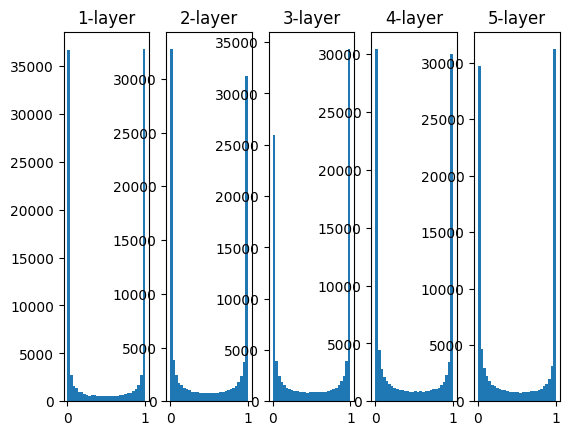

In [9]:
# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

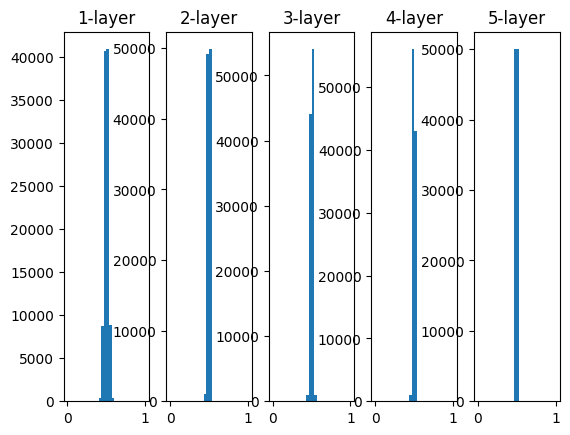

In [10]:
x = np.random.randn(1000, 100)
node_num = 100 # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5 # 隠れ層が5層
activations = {} # ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01

    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

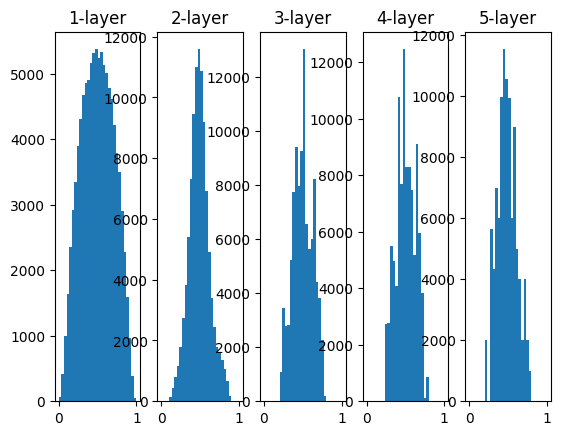

In [11]:
x = np.random.randn(1000, 100)
node_num = 100 # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5 # 隠れ層が5層
activations = {} # ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 6.4　正則化

### 6.4.1　過学習

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

In [3]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

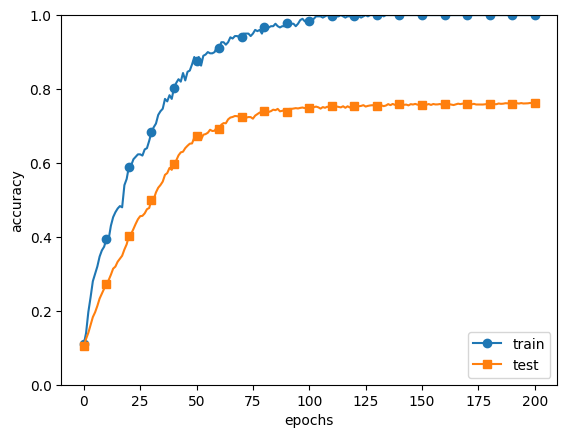

In [4]:
# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.3　Dropout

In [1]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

## 6.5　ハイパーパラメータの検証

### 6.5.1　検証データ

In [2]:
from common.util import shuffle_dataset

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 訓練データをシャッフル
x_train, t_train = shuffle_dataset(x_train, t_train)

# 検証データの分割
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6.5.3　ハイパーパラメータ最適化の実装

In [6]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)